# Stock Market Price Analysis


## Reading the Dataset and Basic Data Cleaning

In [ ]:
# Read the CSV File

data <- read.csv ("/content/Stocks - Reliance.csv", header = TRUE, stringsAsFactors = FALSE)

# print the head of the dataset
head (data)

,Date,Open,High,Low,Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7/1/2002 15:30:00,54.37,55.17,54.07,54.70,870456
2,7/2/2002 15:30:00,54.59,54.76,53.63,53.78,961467
3,7/3/2002 15:30:00,53.76,54.97,53.58,53.99,2370174
4,7/4/2002 15:30:00,54.16,54.56,53.66,53.76,1034747
5,7/5/2002 15:30:00,53.96,54.12,52.80,53.01,2140759
6,7/8/2002 15:30:00,52.35,55.13,52.35,54.74,4601204


### Since it's a time series dataset, we have to format our date feature and set it as the index.

In [ ]:
 # format the Date 
 data$Date = as.Date(data$Date, "%m/%d/%Y")
 head (data)

,Date,Open,High,Low,Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2002-07-01,54.37,55.17,54.07,54.70,870456
2,2002-07-02,54.59,54.76,53.63,53.78,961467
3,2002-07-03,53.76,54.97,53.58,53.99,2370174
4,2002-07-04,54.16,54.56,53.66,53.76,1034747
5,2002-07-05,53.96,54.12,52.80,53.01,2140759
6,2002-07-08,52.35,55.13,52.35,54.74,4601204


In [ ]:
# Set the data column as the index

rownames(data) = data$Date

# Drop the existing date column

#data <- subset(data, select=-c(Date))

head(data)

,Date,Open,High,Low,Close,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2002-07-01,2002-07-01,54.37,55.17,54.07,54.70,870456
2002-07-02,2002-07-02,54.59,54.76,53.63,53.78,961467
2002-07-03,2002-07-03,53.76,54.97,53.58,53.99,2370174
2002-07-04,2002-07-04,54.16,54.56,53.66,53.76,1034747
2002-07-05,2002-07-05,53.96,54.12,52.80,53.01,2140759
2002-07-08,2002-07-08,52.35,55.13,52.35,54.74,4601204


### Since we are not concerned with intra-day trading, the High and Low columns are of the least value. So we drop it.

In [ ]:
# Drop high and Low Column
data <- subset(data, select=-c(High, Low))
head(data)

,Date,Open,Close,Volume
,<date>,<dbl>,<dbl>,<int>
2002-07-01,2002-07-01,54.37,54.70,870456
2002-07-02,2002-07-02,54.59,53.78,961467
2002-07-03,2002-07-03,53.76,53.99,2370174
2002-07-04,2002-07-04,54.16,53.76,1034747
2002-07-05,2002-07-05,53.96,53.01,2140759
2002-07-08,2002-07-08,52.35,54.74,4601204


### Add a column represting the returns after each day's stock transactions. 


We know that for returns 

$returns = \frac{(Close - Open)}{Open}$

In [ ]:
data$returns = (data$Close - data$Open)/data$Open

head (data)

,Date,Open,Close,Volume,returns
,<date>,<dbl>,<dbl>,<int>,<dbl>
2002-07-01,2002-07-01,54.37,54.70,870456,0.006069524
2002-07-02,2002-07-02,54.59,53.78,961467,-0.014837882
2002-07-03,2002-07-03,53.76,53.99,2370174,0.004278274
2002-07-04,2002-07-04,54.16,53.76,1034747,-0.007385524
2002-07-05,2002-07-05,53.96,53.01,2140759,-0.017605634
2002-07-08,2002-07-08,52.35,54.74,4601204,0.045654250


### Drop the Open column to reduce redundancy since it's the closing value of previous day. 

In [ ]:
data<-subset(data, select=-c(Open))
head(data)

,Date,Close,Volume,returns
,<date>,<dbl>,<int>,<dbl>
2002-07-01,2002-07-01,54.70,870456,0.006069524
2002-07-02,2002-07-02,53.78,961467,-0.014837882
2002-07-03,2002-07-03,53.99,2370174,0.004278274
2002-07-04,2002-07-04,53.76,1034747,-0.007385524
2002-07-05,2002-07-05,53.01,2140759,-0.017605634
2002-07-08,2002-07-08,54.74,4601204,0.045654250


### (Optional) Add Categorical columns representing day, month and year. 

In [ ]:
# get it to POSIX format
dates <- as.POSIXct(rownames(data), format="%Y-%m-%d")

# Add day Column 
data$day <- format(dates, format="%d")

# Add month column
data$month <- format (dates, format="%m")

# Add year column
data$year <- format (dates, format="%Y")

head (data)

,Date,Close,Volume,returns,day,month,year
,<date>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
2002-07-01,2002-07-01,54.70,870456,0.006069524,01,07,2002
2002-07-02,2002-07-02,53.78,961467,-0.014837882,02,07,2002
2002-07-03,2002-07-03,53.99,2370174,0.004278274,03,07,2002
2002-07-04,2002-07-04,53.76,1034747,-0.007385524,04,07,2002
2002-07-05,2002-07-05,53.01,2140759,-0.017605634,05,07,2002
2002-07-08,2002-07-08,54.74,4601204,0.045654250,08,07,2002


## Exploratory Data Analysis

### Summary of the dataset


In [ ]:
summary (data)

      Date                Close             Volume            returns          
 Min.   :2002-07-01   Min.   :  44.26   Min.   :       0   Min.   :-0.1569064  
 1st Qu.:2007-07-16   1st Qu.: 339.36   1st Qu.: 3036155   1st Qu.:-0.0110410  
 Median :2012-08-23   Median : 480.07   Median : 4469144   Median :-0.0008904  
 Mean   :2012-08-27   Mean   : 705.72   Mean   : 5789619   Mean   :-0.0007209  
 3rd Qu.:2017-10-04   3rd Qu.: 834.59   3rd Qu.: 6784732   3rd Qu.: 0.0096550  
 Max.   :2022-11-07   Max.   :2819.85   Max.   :65230894   Max.   : 0.2719463  
     day               month               year          
 Length:5027        Length:5027        Length:5027       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

### Plot the High, Volume and returns against the Date. 

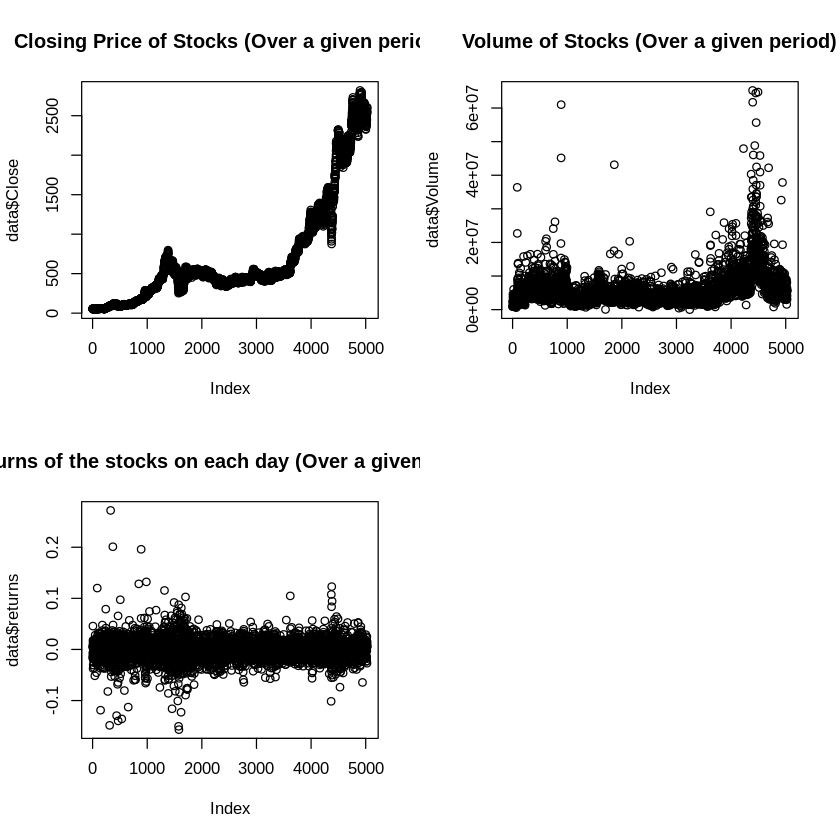

In [ ]:

par(mfrow = c(2,2))

plot(data$Close, main = 'Closing Price of Stocks (Over a given period)')
plot(data$Volume, main = 'Volume of Stocks (Over a given period)')
plot(data$returns, main = 'Returns of the stocks on each day (Over a given period)')

### Explore the Volume feature of the dataset

#### Plot the line graph for volume against the time.

Loading required package: ggplot2



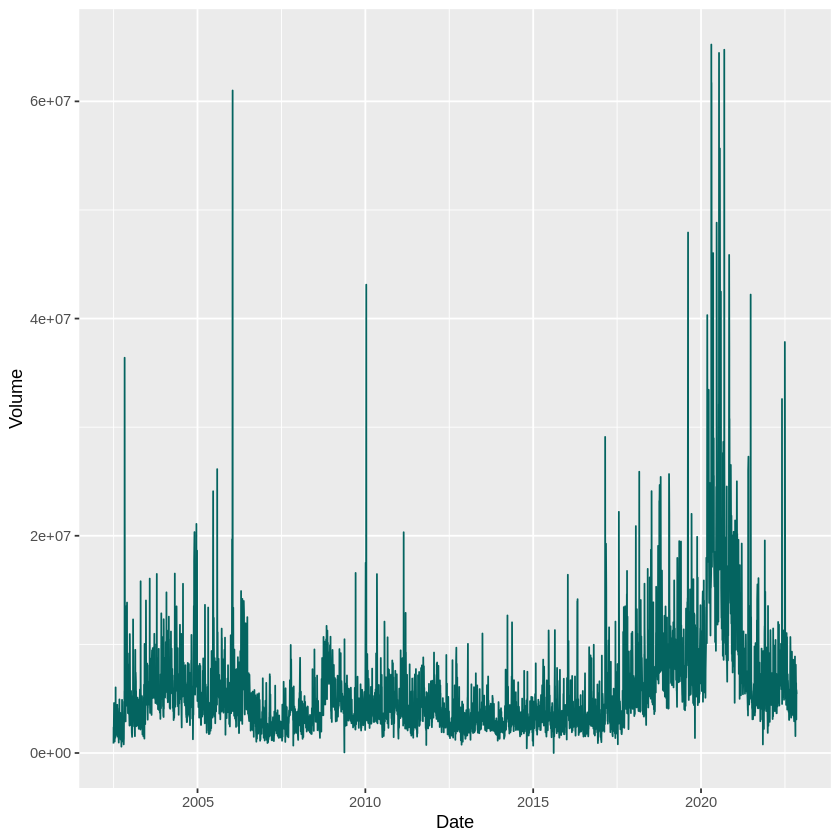

In [ ]:
#import ggplot2

require(ggplot2)

ggplot( data = data.frame(Volume=data$Volume, Date=data$Date), aes( Date, Volume )) + geom_line(color="#046460") 


#### Plot the graph between Volume of stocks dealt with in each year.

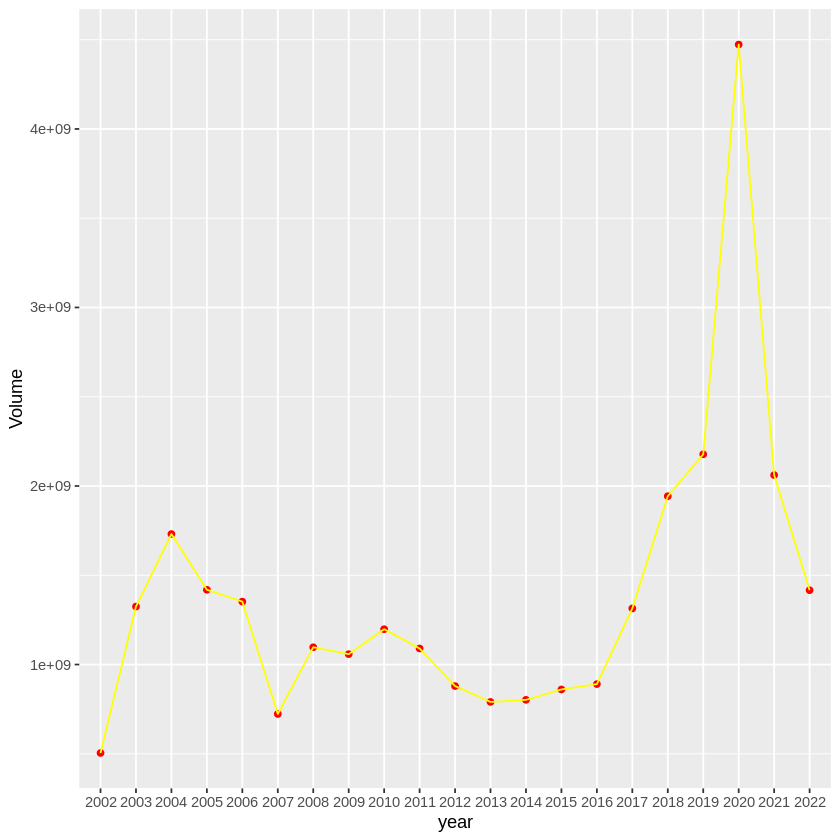

In [ ]:
volume_year = aggregate(Volume ~ year, data, sum)

ggplot( data = volume_year, aes( year, Volume, group=1 )) + geom_point(color="red") + geom_line (color="yellow")

From the above plot we realize that 2020 had an unusual spike in volume of stocks exchanged for reliance. And in 2002 it was minimum.

#### Plot the graph between Volume of stocks and the month of the year.

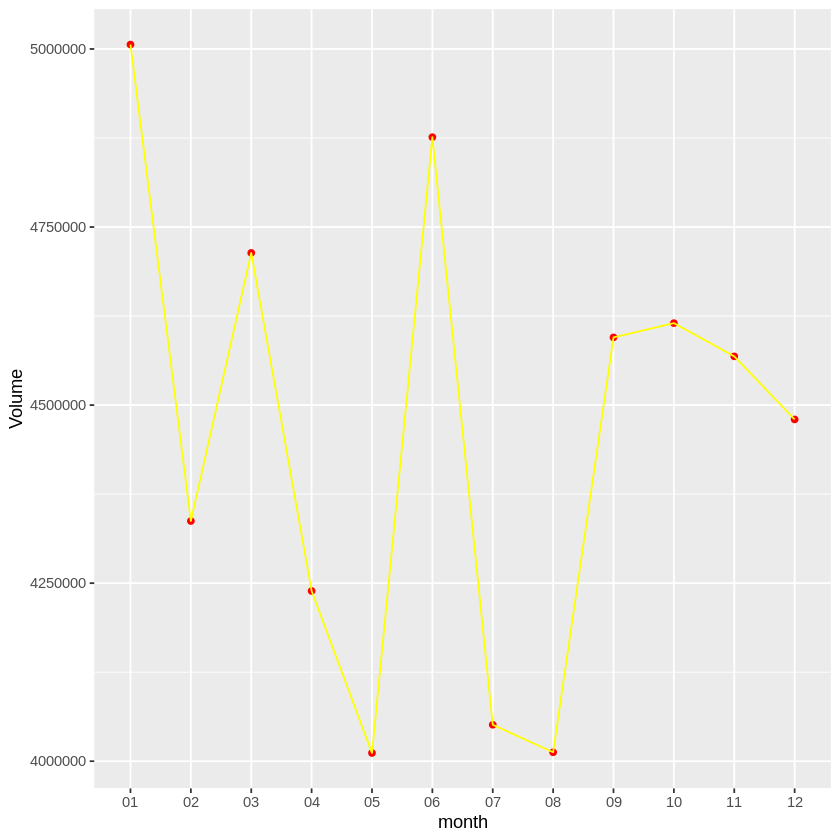

In [ ]:
volume_month = aggregate(Volume ~ month, data, median)

ggplot( data = volume_month, aes( month, Volume, group=1 )) + geom_point(color="red") + geom_line (color="yellow")

From the above plot we realise that in May and August there's the least exchanges done whereas its maximum on January. 

#### Scattter plot for Volume. 

`geom_smooth()` using formula = 'y ~ x'


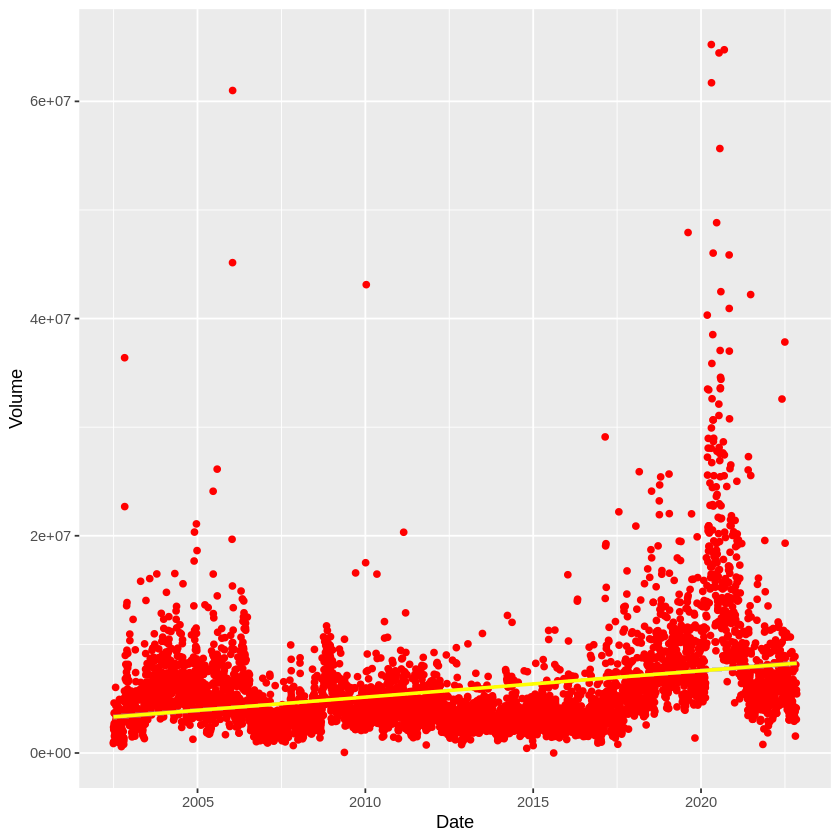

In [ ]:
ggplot( data = data.frame(Volume=data$Volume, Date=data$Date), aes( Date, Volume )) + geom_point(color="red") + geom_smooth(method=lm, se=TRUE, color="yellow")

#### Box Plot for Volume

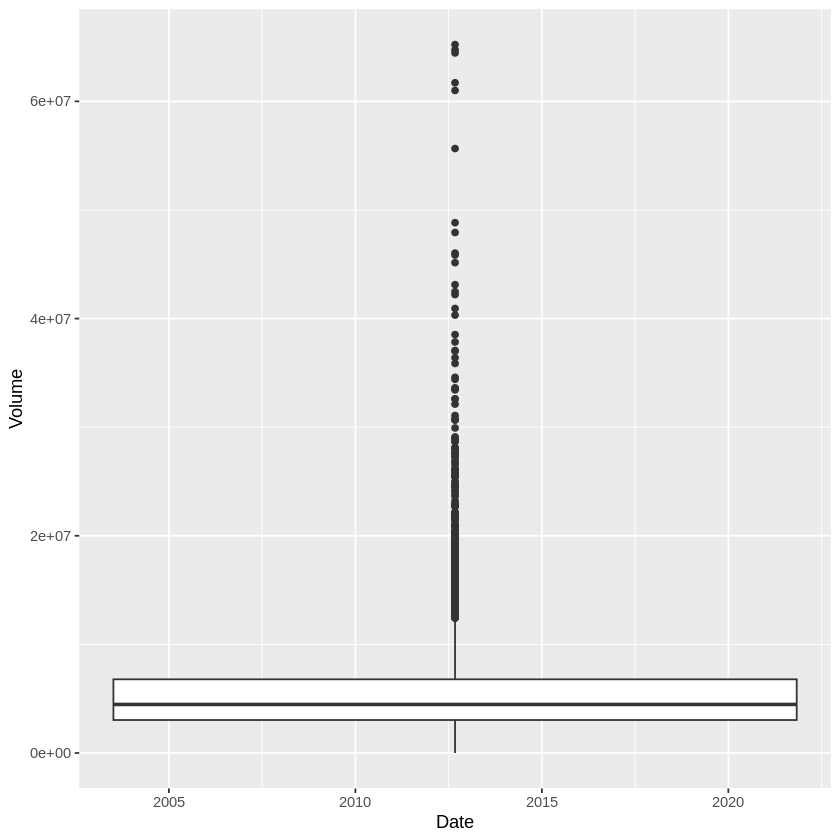

In [ ]:
ggplot( data = data.frame(Volume=data$Volume, Date=data$Date), aes( Date, Volume )) + geom_boxplot(aes(x=Date, y=Volume, group=1))

#### Density plot for Volume

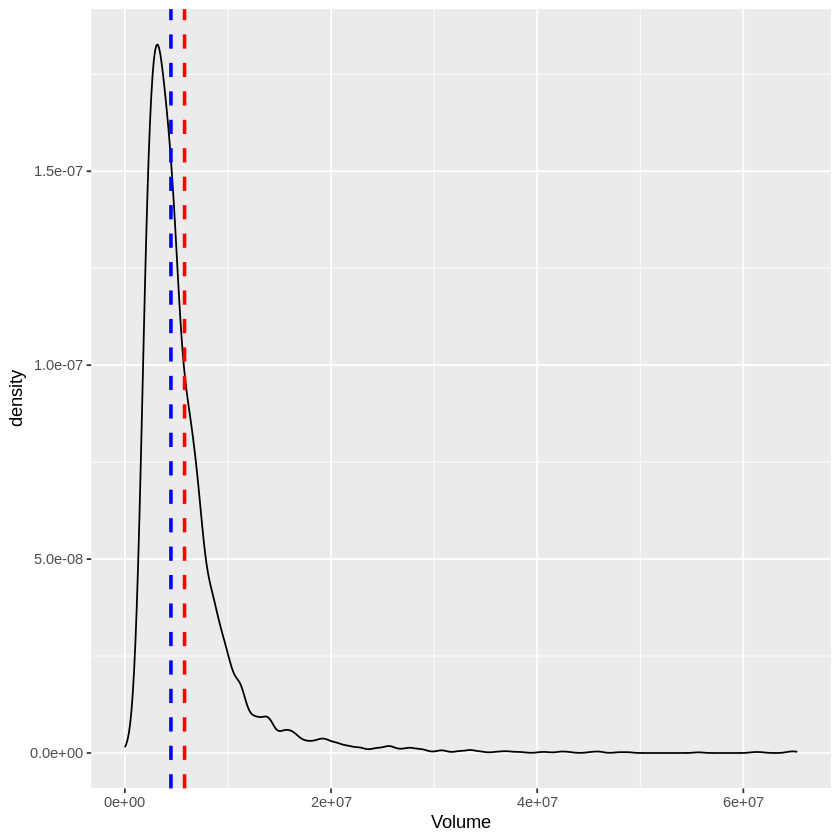

In [ ]:
density_volume <- ggplot(data, aes(x=Volume)) + geom_density ()
density_volume + geom_vline(aes(xintercept=mean(Volume)), color="red", linetype="dashed", linewidth=1) + geom_vline(aes(xintercept=median(Volume)), color="blue", linetype="dashed", linewidth=1)

### Exploring the Closing Prices


#### Plot line graph for closing price against time


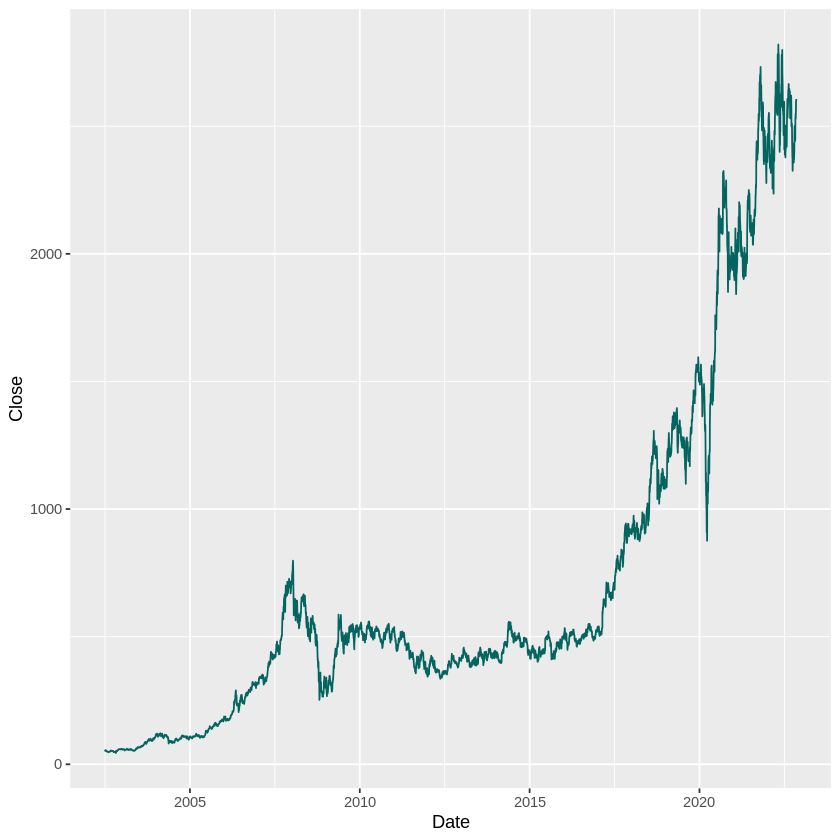

In [ ]:
ggplot( data = data.frame(Close=data$Close, Date=data$Date), aes( Date, Close )) + geom_line(color="#046460") 

#### Minimum and maximum closing prices for Reliance Stock

##### Date at which it had worst closing price

In [ ]:
data_min <- data[which.min(data$Close), ]

data_min

,Date,Close,Volume,returns,day,month,year
,<date>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
2002-10-28,2002-10-28,44.26,2880309,-0.01337494,28,10,2002


##### Date at which it had best closing price

In [ ]:
data_max <- data[which.max(data$Close), ]

data_max

,Date,Close,Volume,returns,day,month,year
,<date>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
2022-04-28,2022-04-28,2819.85,11820892,0.003523194,28,04,2022


#### Plot the graph between Cloosing Price of stocks against each year.

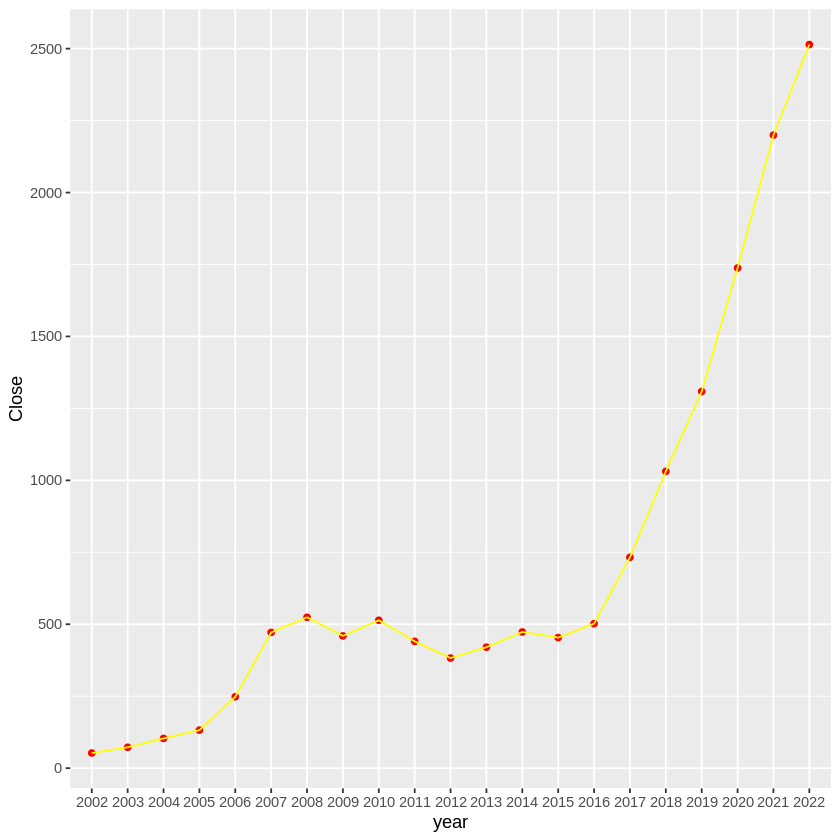

In [ ]:
close_year = aggregate(Close ~ year, data, mean)

ggplot( data = close_year, aes( year, Close, group=1 )) + geom_point(color="red") + geom_line (color="yellow")

We can observe that Reliance has been experiencing steady growth since year 2016.
**Possible Reason:** Jio was launched on 2016.

#### Plot the graph between Closing Price of stocks against each month of the year

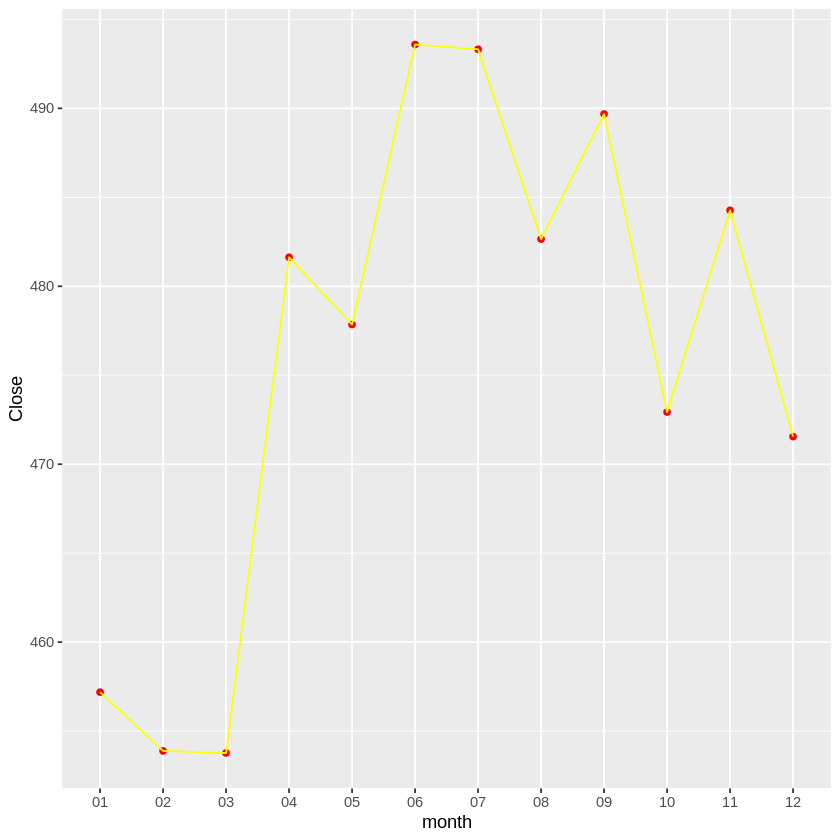

In [ ]:
close_month = aggregate(Close ~ month, data, median)

ggplot( data = close_month, aes( month, Close, group=1 )) + geom_point(color="red") + geom_line (color="yellow")

We see that there appears to be a spike in the closing price at the mont of May. Months of June and July seems to experience highest closing price whereas January to March the closing price seems to be lowest

#### Scatter Plot for Clsoing Price.

`geom_smooth()` using formula = 'y ~ x'


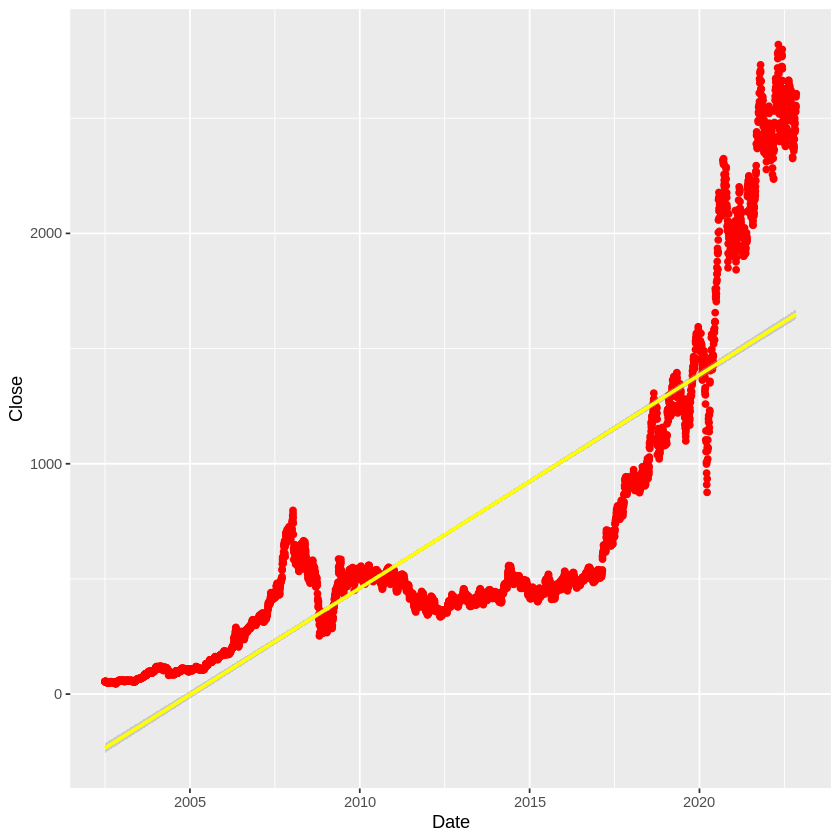

In [ ]:
ggplot( data = data.frame(Close=data$Close, Date=data$Date), aes( Date, Close )) + geom_point(color="red") + geom_smooth(method=lm, se=TRUE, color="yellow")

#### Box Plot for Closing Price

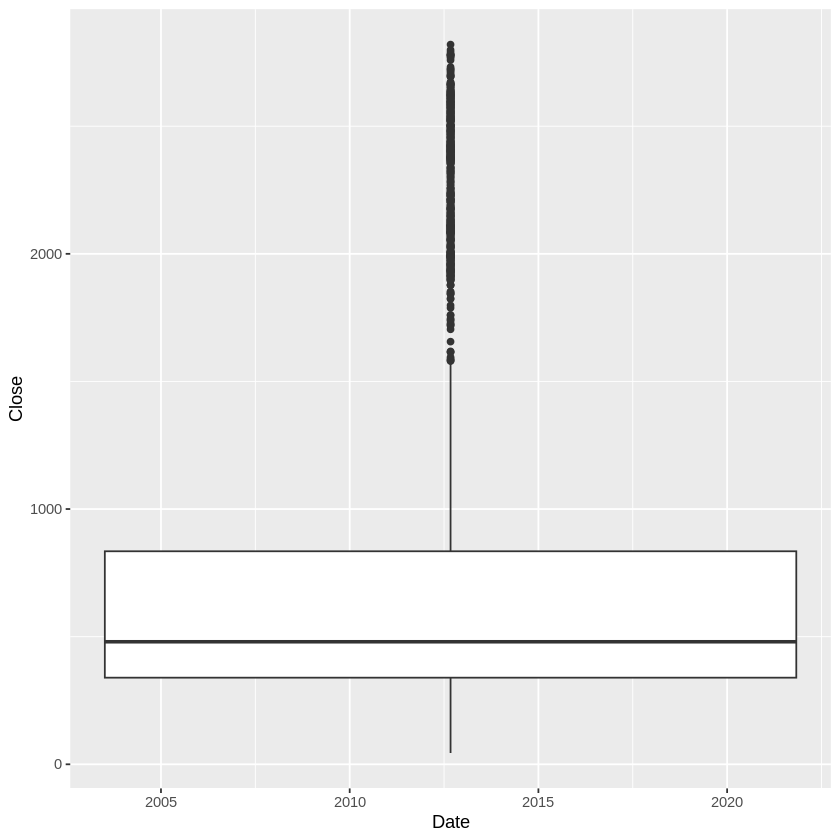

In [ ]:
ggplot( data = data.frame(Close=data$Close, Date=data$Date), aes( Date, Close )) + geom_boxplot(aes(x=Date, y=Close, group=1))

#### Density Plot for Closing Price

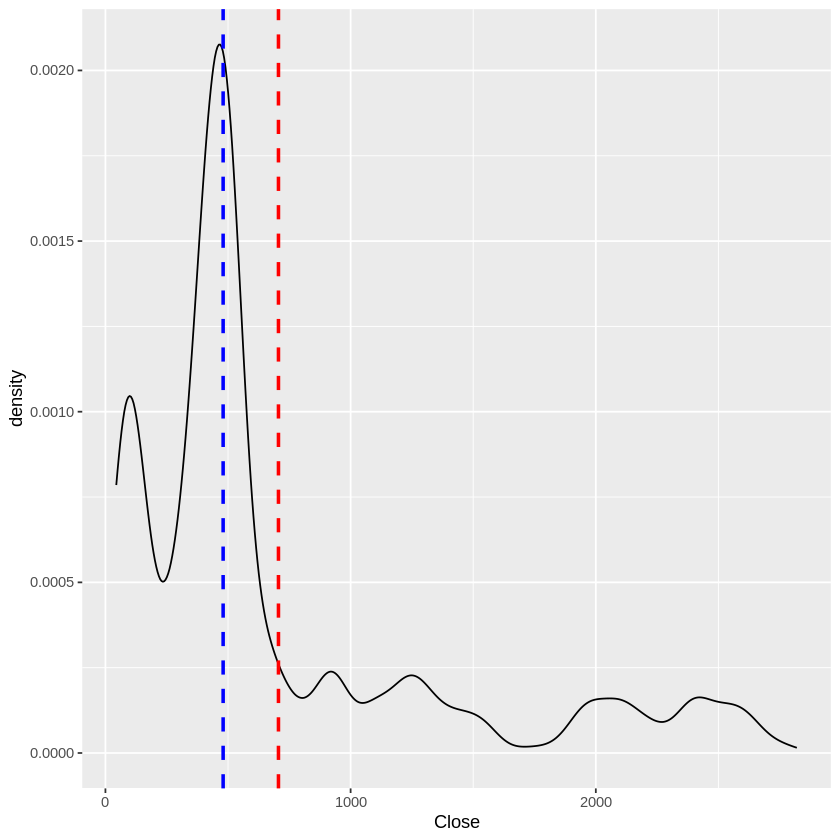

In [ ]:
density_close <- ggplot(data, aes(x=Close)) + geom_density ()
density_close + geom_vline(aes(xintercept=mean(Close)), color="red", linetype="dashed", linewidth=1) + geom_vline(aes(xintercept=median(Close)), color="blue", linetype="dashed", linewidth=1)

### Exploring the Returns Feature

#### Plotting returns against time

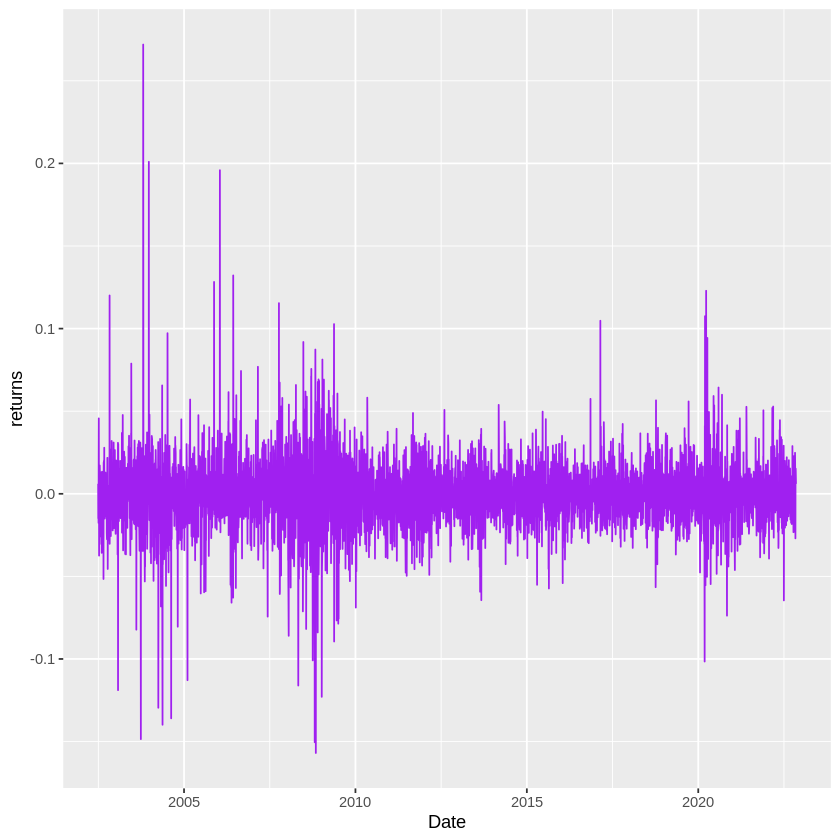

In [ ]:
ggplot( data = data.frame(returns=data$returns, Date=data$Date), aes( Date, returns )) + geom_line(color="purple") 

#### Maximum and Minimum returns for Reliance Stock

##### Date where Reliance had Maximum returns

In [ ]:
data_max <- data[which.max(data$returns), ]

data_max

,Date,Close,Volume,returns,day,month,year
,<date>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
2003-10-24,2003-10-24,94.76,6294240,0.2719463,24,10,2003


##### Date where Reliance had minimum returns

In [ ]:
data_min <- data[which.min(data$returns), ]

data_min

,Date,Close,Volume,returns,day,month,year
,<date>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
2008-11-05,2008-11-05,314.28,11704998,-0.1569064,05,11,2008


#### Scatter plot for returns

`geom_smooth()` using formula = 'y ~ x'


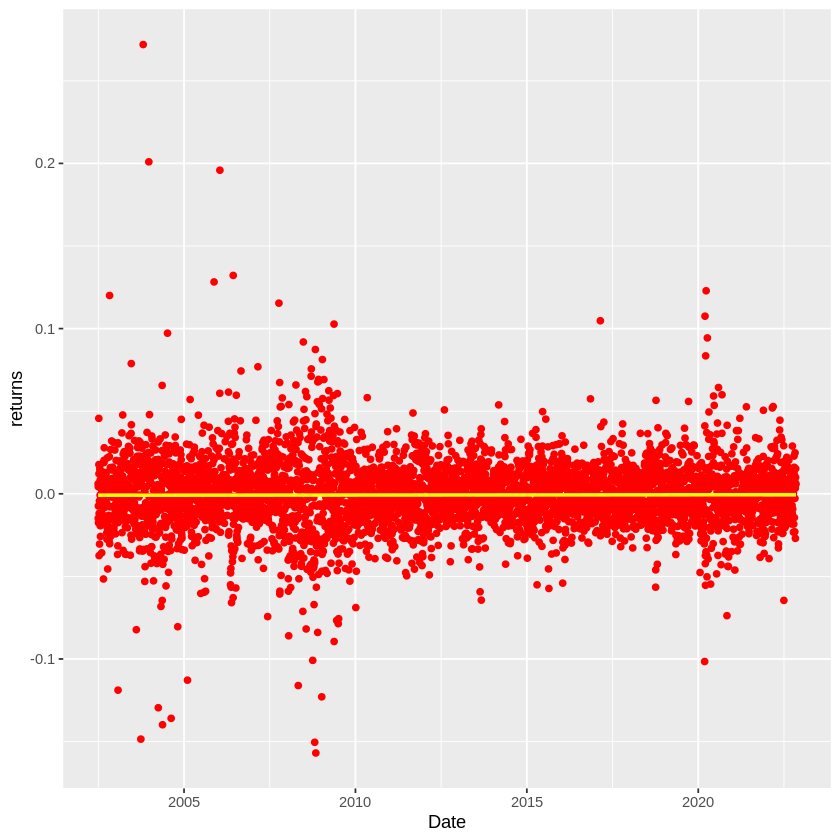

In [ ]:
ggplot( data = data.frame(returns=data$returns, Date=data$Date), aes( Date, returns )) + geom_point(color="red") + geom_smooth(method=lm, se=TRUE, color="yellow")

#### Box plot for returns

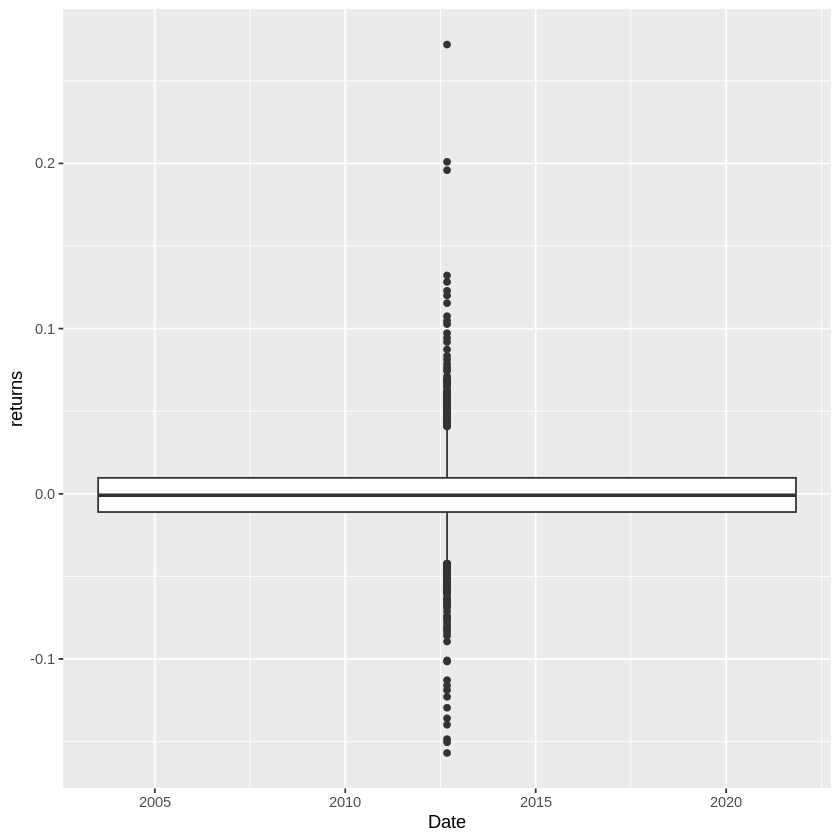

In [ ]:
ggplot( data = data.frame(returns=data$returns, Date=data$Date), aes( Date, returns )) + geom_boxplot(aes(x=Date, y=returns, group=1))

#### Density plot for returns

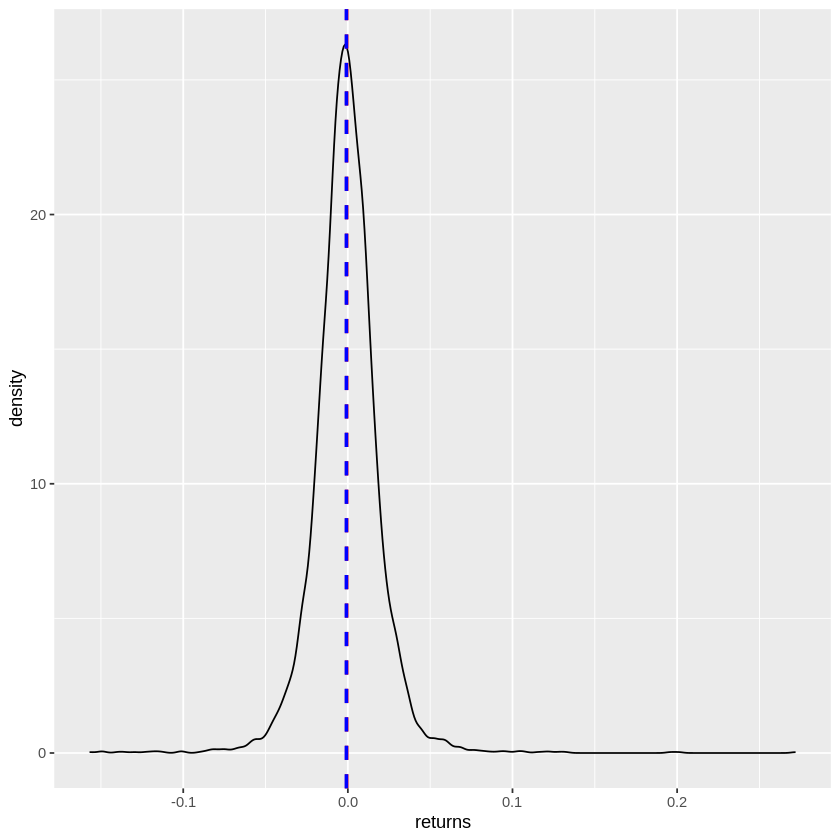

In [ ]:
density_returns <- ggplot(data, aes(x=returns)) + geom_density ()
density_returns + geom_vline(aes(xintercept=mean(returns)), color="red", linetype="dashed", linewidth=1) + geom_vline(aes(xintercept=median(returns)), color="blue", linetype="dashed", linewidth=1)

## Hypothesis Testing

#### Corelation Test


In [ ]:
cor.test(data$Close, data$Volume)


	Pearson's product-moment correlation

data:  data$Close and data$Volume
t = 28.189, df = 5025, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3454004 0.3931455
sample estimates:
      cor 
0.3695168 


#### Augemented Dickey-Fuller Test

In [ ]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’




In [ ]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
adf.test(data$Close)


	Augmented Dickey-Fuller Test

data:  data$Close
Dickey-Fuller = -0.87562, Lag order = 17, p-value = 0.9549
alternative hypothesis: stationary


The series is not significant since it is greater than 0.5. We check the significance by differentiating the Closing price once. 

In [ ]:
Close_diff<-diff(data$Close)
adf.test(Close_diff)

Warning message in adf.test(Close_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Close_diff
Dickey-Fuller = -17.206, Lag order = 17, p-value = 0.01
alternative hypothesis: stationary


The p-value is less than 0.5. Hence null hypothesis is rejected.

#### Plot the graphs for Close_diff

##### Density Curve

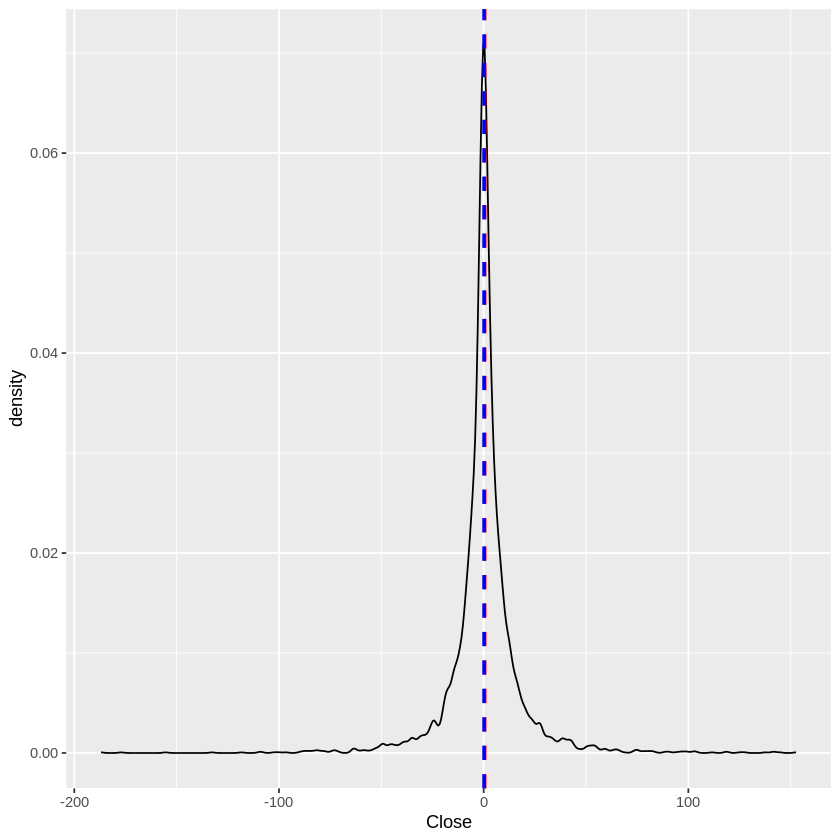

In [ ]:
density_close_diff <- ggplot(data.frame(Close=Close_diff, Date=data[-1,]$Date), aes(x=Close)) + geom_density ()
density_close_diff + geom_vline(aes(xintercept=mean(Close)), color="red", linetype="dashed", linewidth=1) + geom_vline(aes(xintercept=median(Close)), color="blue", linetype="dashed", linewidth=1)

#### Plot against date

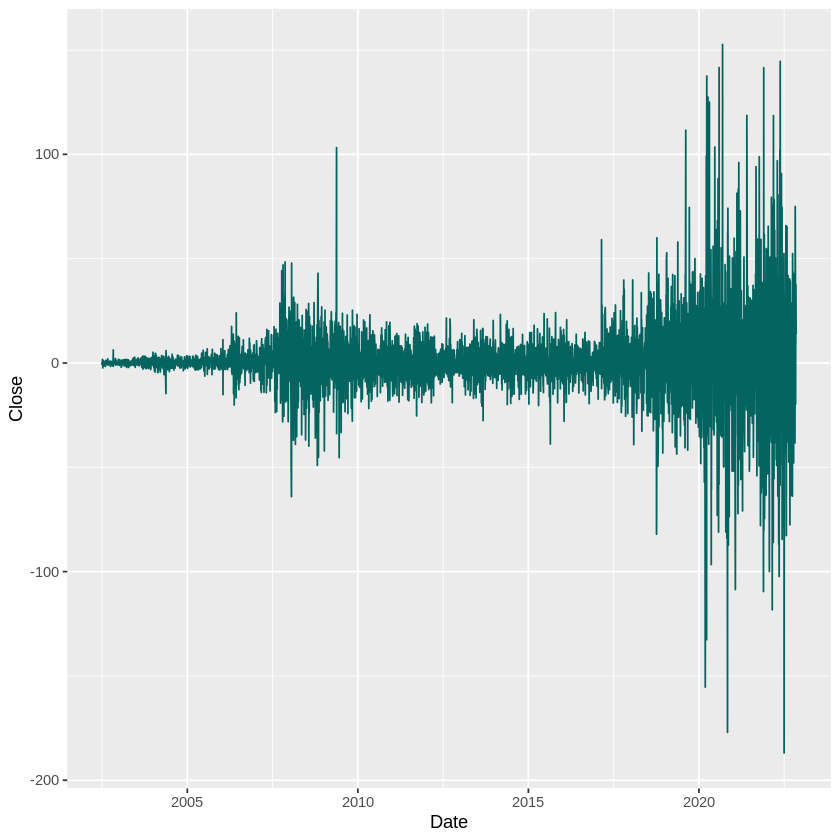

In [ ]:
ggplot( data = data.frame(Close=Close_diff, Date=data[-1,]$Date), aes( Date, Close )) + geom_line(color="#046460") 

## Modelling

### R provides simple and automatic way to generate appropriate model ARIMA(p, d, q) using auto.arima() function in forecast package. 

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [ ]:
library(forecast)

## Summary for choosen best arima(p,d,q) model

In [ ]:
model<-auto.arima (data$Close)
summary(model)

Series: data$Close 
ARIMA(2,1,2) with drift 

Coefficients:
          ar1      ar2     ma1     ma2   drift
      -0.2843  -0.9523  0.3006  0.9764  0.5042
s.e.   0.0107   0.0123  0.0076  0.0086  0.2589

sigma^2 = 325.4:  log likelihood = -21667.41
AIC=43346.82   AICc=43346.83   BIC=43385.95

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.003106244 18.02924 9.919468 -0.1231123 1.477883 0.9965561
                    ACF1
Training set 0.009543076

In [ ]:
forecasted_value <- forecast(model, 10)
head(forecasted_value)

$method
[1] "ARIMA(2,1,2) with drift"

$model
Series: data$Close 
ARIMA(2,1,2) with drift 

Coefficients:
          ar1      ar2     ma1     ma2   drift
      -0.2843  -0.9523  0.3006  0.9764  0.5042
s.e.   0.0107   0.0123  0.0076  0.0086  0.2589

sigma^2 = 325.4:  log likelihood = -21667.41
AIC=43346.82   AICc=43346.83   BIC=43385.95

$level
[1] 80 95

$mean
Time Series:
Start = 5028 
End = 5037 
Frequency = 1 
 [1] 2603.445 2604.315 2608.200 2607.394 2605.052 2607.613 2610.243 2608.184
 [9] 2607.392 2610.706

$lower
Time Series:
Start = 5028 
End = 5037 
Frequency = 1 
          80%      95%
5028 2580.325 2568.087
5029 2571.353 2553.904
5030 2567.459 2545.892
5031 2560.381 2535.494
5032 2552.640 2524.894
5033 2550.086 2519.633
5034 2547.974 2515.010
5035 2541.704 2506.512
5036 2536.940 2499.645
5037 2536.330 2496.958

$upper
Time Series:
Start = 5028 
End = 5037 
Frequency = 1 
          80%      95%
5028 2626.564 2638.802
5029 2637.278 2654.727
5030 2648.942 2670.509
5031 2654.407 2

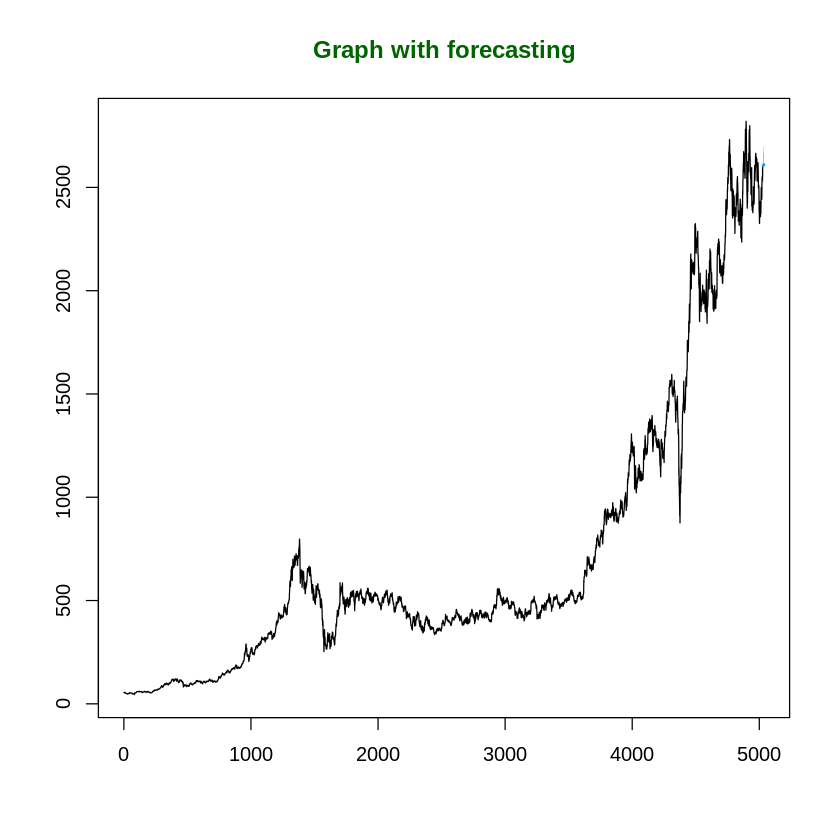

In [ ]:
plot(forecasted_value, main = "Graph with forecasting",
col.main = "darkgreen") 


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2) with drift
Q* = 17.585, df = 6, p-value = 0.007359

Model df: 4.   Total lags used: 10



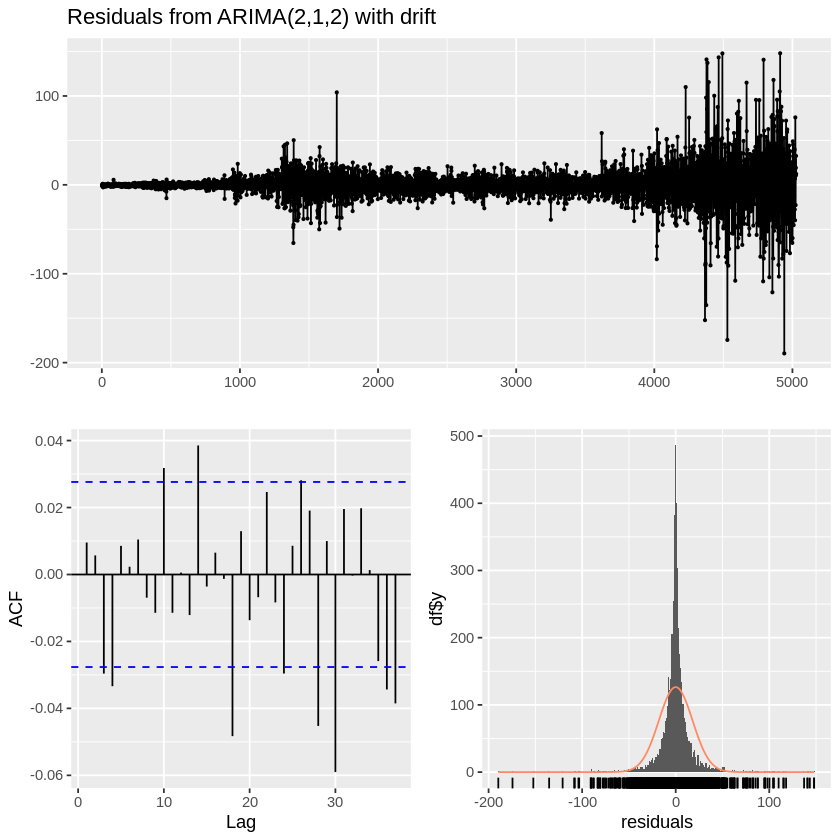

In [ ]:
checkresiduals (model)

Here residuals are not a white noise sequence. This implies that the model might not have accounted for all the signals and therefore residuals consist of signal plus white noise.

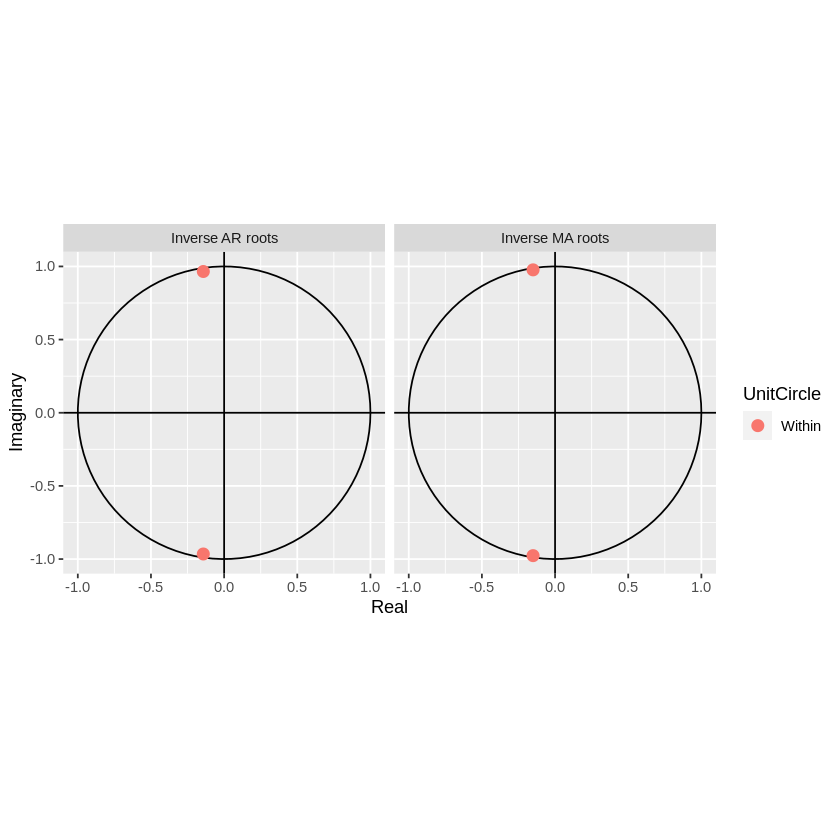

In [ ]:
autoplot (model)

In [ ]:
install.packages("caTools")
require (caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Loading required package: caTools



In [ ]:
ind = sample.split(Y = data$Close, SplitRatio = 0.7)

In [ ]:
train = data[ind,]

In [ ]:
test = data[!ind,]

In [ ]:
dim(train)

[1] 3518    7

In [ ]:
dim(test)

[1] 1509    7

In [ ]:
Lambda<- BoxCox.lambda(train$Close)
num_year <- as.numeric(train$year)
fit_model<- auto.arima(train$Close,D=1,approximation = F,allowdrift = T,allowmean = T,lambda = Lambda, xreg = train$Volume)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,1,0) errors
Q* = 23.426, df = 10, p-value = 0.009278

Model df: 0.   Total lags used: 10



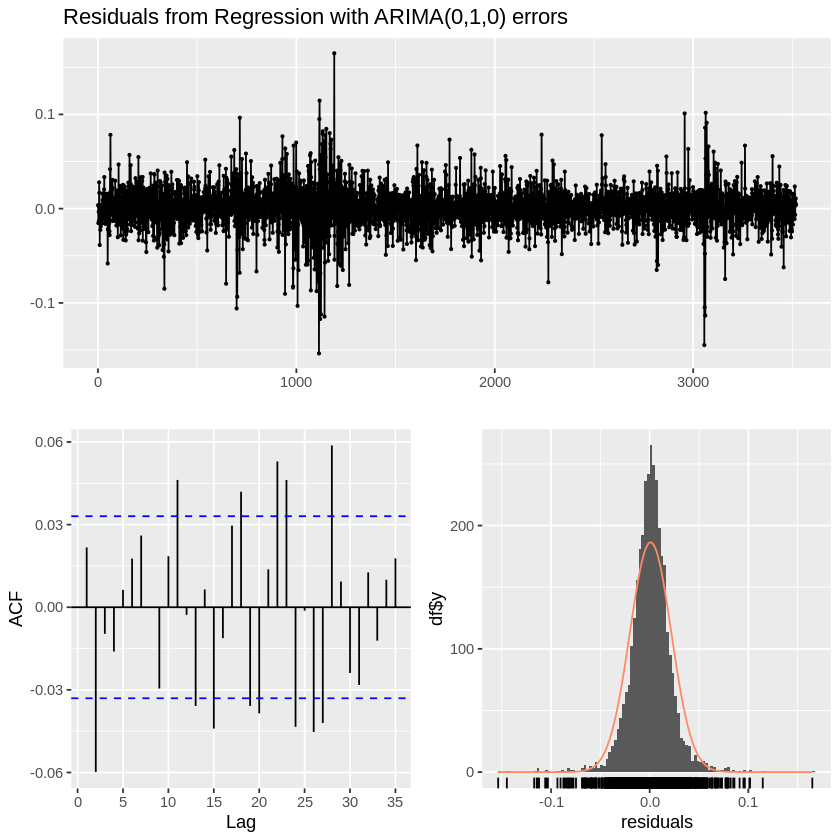

In [ ]:
forecast_complex1<-forecast(fit_model,50,xreg = test$Volume)
checkresiduals(fit_model)

In [ ]:
head(Lambda)

[1] -0.02679275

In [ ]:
num_year <- as.numeric(test$year)
accuracy(object = forecast_complex1$fitted,x = test$Close)

,ME,RMSE,MAE,MPE,MAPE
Test set,415.1241,701.689,444.2528,43.99022,50.43681


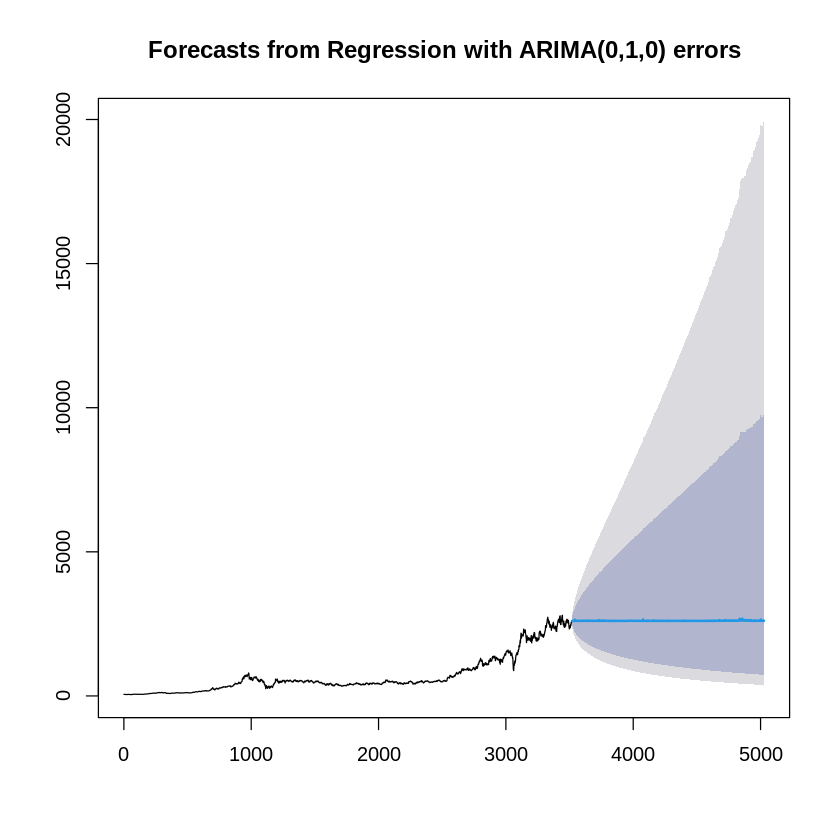

In [ ]:
plot(forecast_complex1)

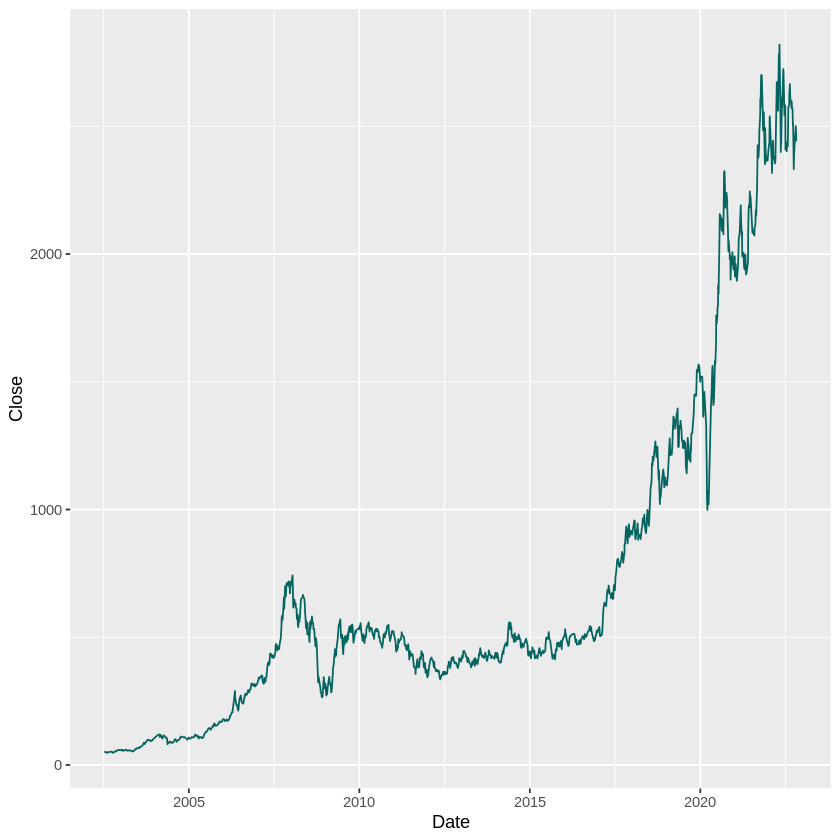

In [ ]:
ggplot( data = data.frame(Close=test$Close, Date=test$Date), aes( Date, Close )) + geom_line(color="#046460") 

In [ ]:
num_year <- as.numeric(train$year)


In [ ]:
num_year

[1] 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002
  [15] 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002
  [29] 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002
  [43] 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002
  [57] 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002
  [71] 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 2002
  [85] 2002 2002 2002 2002 2002 2002 2003 2003 2003 2003 2003 2003 2003 2003
  [99] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [113] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [127] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [141] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [155] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [169] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [183] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [197] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [211] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [225] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [239] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [253] 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003 2003
 [267] 2003 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [281] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [295] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [309] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [323] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [337] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [351] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [365] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [379] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [393] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [407] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [421] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [435] 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 2004
 [449] 2004 2004 2004 2004 2004 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [463] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [477] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [491] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [505] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [519] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [533] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [547] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [561] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [575] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [589] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [603] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [617] 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005 2005
 [631] 2005 2005 2005 2005 2005 2005 2006 2006 2006 2006 2006 2006 2006 2006
 [645] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 [659] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 [673] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 [687] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 [701] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 [715] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006

In [ ]:
fit_model

Series: train$Close 
Regression with ARIMA(0,1,0) errors 
Box Cox transformation: lambda= -0.02679275 

Coefficients:
      xreg
         0
s.e.     0

sigma^2 = 0.0004436:  log likelihood = 8586.86
AIC=-17169.72   AICc=-17169.71   BIC=-17157.39

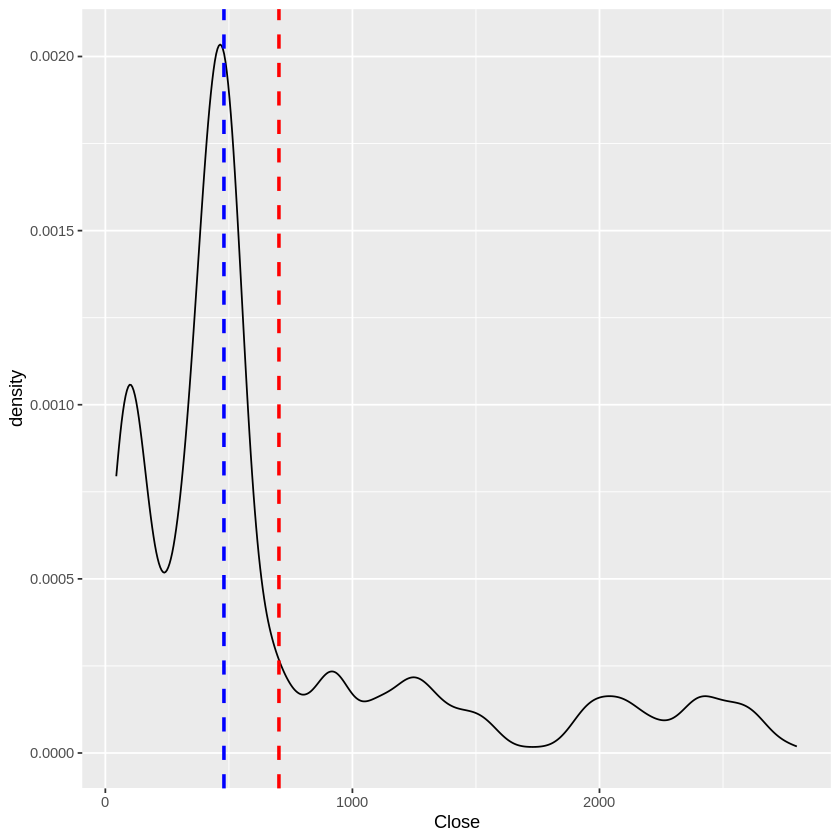

In [ ]:
density_close <- ggplot(train, aes(x=Close)) + geom_density ()
density_close + geom_vline(aes(xintercept=mean(Close)), color="red", linetype="dashed", linewidth=1) + geom_vline(aes(xintercept=median(Close)), color="blue", linetype="dashed", linewidth=1)

### Implementing RNN for stock price prediction.

#### Splitting the dataset

In [ ]:
splitFactor <- sample.split(Y = data$Close, SplitRatio = 0.9)
train<-data[splitFactor,]
test<-data[!splitFactor,]

In [ ]:
head(train)

,Date,Close,Volume,returns,day,month,year
,<date>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
2002-07-01,2002-07-01,54.70,870456,0.006069524,01,07,2002
2002-07-02,2002-07-02,53.78,961467,-0.014837882,02,07,2002
2002-07-03,2002-07-03,53.99,2370174,0.004278274,03,07,2002
2002-07-04,2002-07-04,53.76,1034747,-0.007385524,04,07,2002
2002-07-05,2002-07-05,53.01,2140759,-0.017605634,05,07,2002
2002-07-08,2002-07-08,54.74,4601204,0.045654250,08,07,2002


In [ ]:
head (test)

,Date,Close,Volume,returns,day,month,year
,<date>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
2002-07-24,2002-07-24,50.65,2198390,-0.0193610842,24,07,2002
2002-07-25,2002-07-25,50.70,6039297,-0.0124659135,25,07,2002
2002-08-16,2002-08-16,48.89,1975544,0.0074180919,16,08,2002
2002-08-23,2002-08-23,50.29,1411719,-0.0005961844,23,08,2002
2002-09-06,2002-09-06,53.49,2514536,-0.0013069455,06,09,2002
2002-09-16,2002-09-16,51.96,2115338,-0.0074498567,16,09,2002


#### Using grnn Model

In [ ]:
install.packages ("tsfgrnn")
require(tsfgrnn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tsfgrnn



In [ ]:
library (tsfgrnn)
pred <- grnn_forecasting (train$Close, h=10)


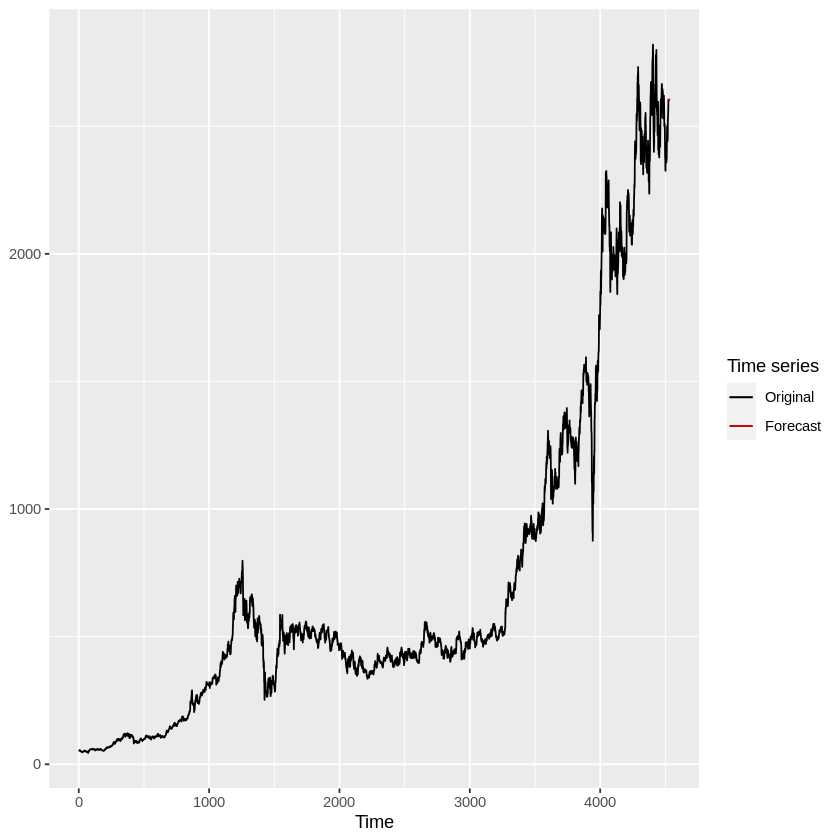

In [ ]:
autoplot (pred)

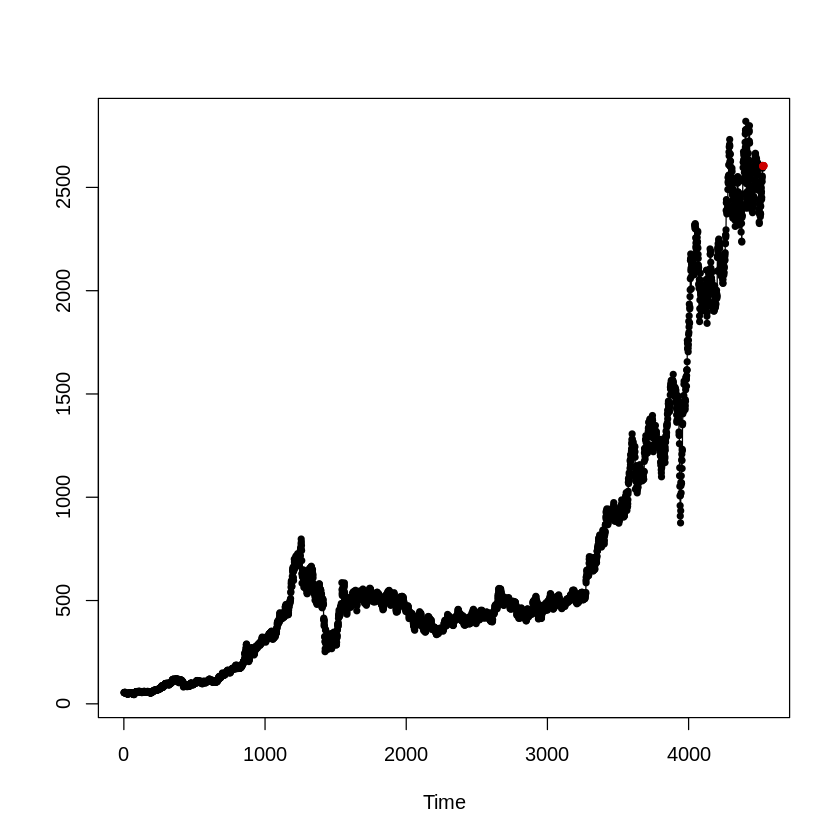

In [ ]:
plot(pred)

In [ ]:
ro <- rolling_origin(pred, h = 4)

In [ ]:
print(ro$test_sets)

         h=1     h=2     h=3    h=4
[1,] 2545.65 2555.15 2592.75 2606.6
[2,] 2555.15 2592.75 2606.60     NA
[3,] 2592.75 2606.60      NA     NA
[4,] 2606.60      NA      NA     NA


In [ ]:
print(ro$predictions)

          h=1      h=2      h=3      h=4
[1,] 2527.048 2526.377 2524.806 2525.704
[2,] 2547.155 2548.053 2547.808       NA
[3,] 2556.741 2557.908       NA       NA
[4,] 2588.336       NA       NA       NA


In [ ]:
print(ro$errors)

           h=1      h=2      h=3      h=4
[1,] 18.601525 28.77345 67.94432 80.89607
[2,]  7.995008 44.69749 58.79219       NA
[3,] 36.008873 48.69182       NA       NA
[4,] 18.263534       NA       NA       NA


In [ ]:
ro$global_accu

RMSE       MAE      MAPE     SMAPE 
46.748187 41.066429  1.583074  1.599450

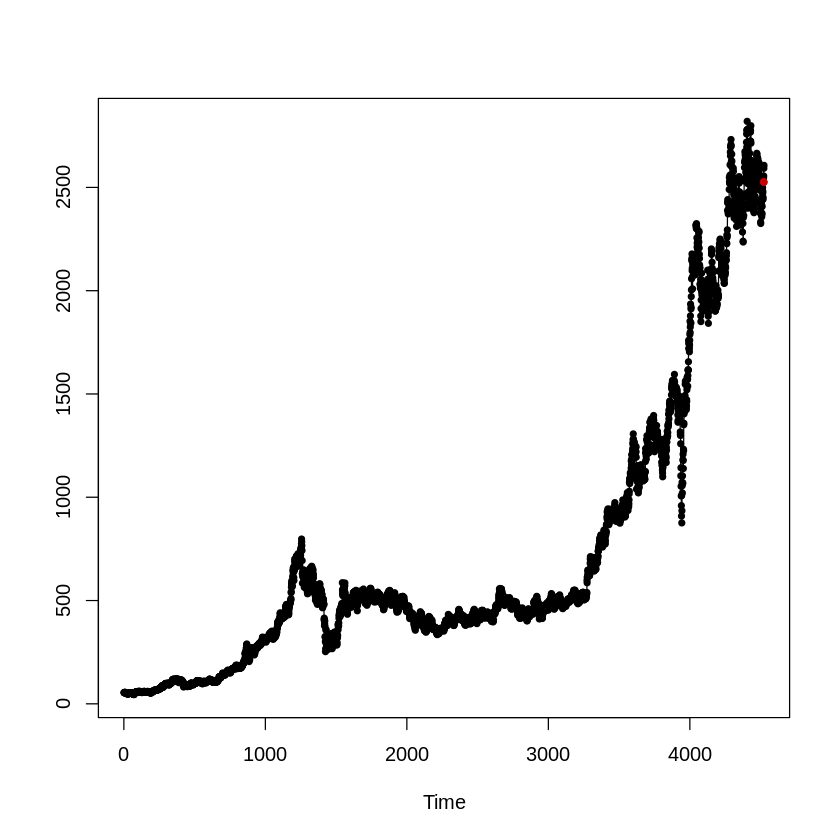

In [ ]:
plot(ro, h = 4)